In [3]:
import sys
sys.path.append('..')

#autoreload
%load_ext autoreload
%autoreload 2

from src.election_model import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
b = ElectionsModel('2024-03-10')
model = b.build_model()

In [ ]:
prior_2,trace_2,post_2 = b.sample_all(
    var_names=[
        "latent_popularity",
        "latent_pop_t0",
        "R",
        "noisy_popularity",
        "N_approve",
    ],
)

Sampling: [N_approve, R, concentration_polls, concentration_results, election_party_baseline, election_party_baseline_sd, election_party_baseline_sd_baseline, election_party_baseline_sd_party_effect, election_party_sd, election_party_time_coefs, house_effects, house_election_effects_raw, house_election_effects_sd, lsd_baseline, lsd_party_effect_election_party_amplitude, lsd_party_effect_party_amplitude, party_baseline, party_baseline_sd, party_time_coefs_raw, poll_bias]


In [ ]:
prior,trace,post = a.sample_all(
    var_names=[
        "latent_popularity",
        #"latent_pop_t0",
        #"R",
        "noisy_popularity",
        "N_approve",
    ],
)

In [5]:
arviz.to_netcdf(prior_2, "prior_2.nc")
arviz.to_netcdf(trace_2, "trace_2.nc")
arviz.to_netcdf(post_2, "posterior_2.nc")


'posterior_2.nc'

In [2]:
# read trace_2, prior_2, posterior_2
prior_2 =  arviz.from_netcdf("prior_2.nc")
trace_2 = arviz.from_netcdf("trace_2.nc")
posterior_2 = arviz.from_netcdf("posterior_2.nc")



In [3]:
trace_2

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data
	> constant_data

/opt/conda/lib/python3.11/site-packages/arviz/plots/traceplot.py:222: UserWarning: rcParams['plot.max_subplots'] (100) is smaller than the number of variables to plot (3304), generating only 100 plots
  warnings.warn(


AttributeError: 'NoneType' object has no attribute 'items'

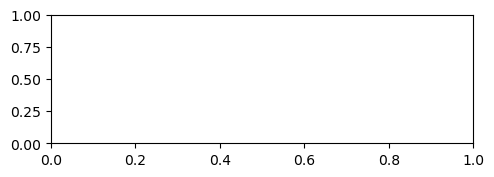

In [6]:
import arviz as az

az.rcParams["plot.max_subplots"] = 200
az.plot_trace(trace_2, combined=False, compact=False, legend=True, var_names=["noisy_popularity"], )

In [4]:
az.summary(trace_2)

ValueError: setting an array element with a sequence.

In [ ]:
polls_train = a.polls_train.copy()
retrodictive_plot(
    trace.sel(
        elections="2022-01-30",
        observations=polls_train[polls_train.election_date == "2022-01-30"].index,
    ),
    a.political_families,
    polls_train[polls_train.election_date == "2022-01-30"],
    group="prior",
)

In [ ]:
arviz.to_netcdf(trace, "../trace.nc")


In [ ]:
arviz.plot_trace(trace, var_names='latent_popularity')

In [ ]:
post_2.set_coords()

In [ ]:
temp_results_df.drop(columns='territoryName').sum()

In [14]:
retrodictive_plot(
    trace_2.sel(
        elections="2022-01-30",
        observations=a.polls_train[a.polls_train.election_date == "2022-01-30"].index,
    ),
    post_2.sel(
        elections="2022-01-30",
        observations=a.polls_train[a.polls_train.election_date == "2022-01-30"].index,
    ),
    a.political_families,
    a.polls_train[a.polls_train.election_date == "2022-01-30"],
    group="posterior",
)

NameError: name 'a' is not defined

In [4]:
post_2

NameError: name 'post_2' is not defined

In [3]:
trace_2 = arviz.from_netcdf("trace.nc")

In [8]:
election_forecast

Inference data with groups:
	> posterior_predictive
	> observed_data
	> constant_data

In [4]:
election_forecast = b.forecast_election(trace_2)


/opt/conda/lib/python3.11/site-packages/pymc/data.py:434: UserWarning: The `mutable` kwarg was not specified. Before v4.1.0 it defaulted to `pm.Data(mutable=True)`, which is equivalent to using `pm.MutableData()`. In v4.1.0 the default changed to `pm.Data(mutable=False)`, equivalent to `pm.ConstantData`. Use `pm.ConstantData`/`pm.MutableData` or pass `pm.Data(..., mutable=False/True)` to avoid this warning.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/pymc/data.py:434: UserWarning: The `mutable` kwarg was not specified. Before v4.1.0 it defaulted to `pm.Data(mutable=True)`, which is equivalent to using `pm.MutableData()`. In v4.1.0 the default changed to `pm.Data(mutable=False)`, equivalent to `pm.ConstantData`. Use `pm.ConstantData`/`pm.MutableData` or pass `pm.Data(..., mutable=False/True)` to avoid this warning.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/pymc/data.py:434: UserWarning: The `mutable` kwarg was not specified. Before v4.1.0 it defaulted to `pm.

In [5]:
election_forecast,PREDICTION_COORDS,PREDICTION_DIMS = election_forecast

In [6]:
election_forecast.assign_coords(coords=PREDICTION_COORDS, inplace=True)

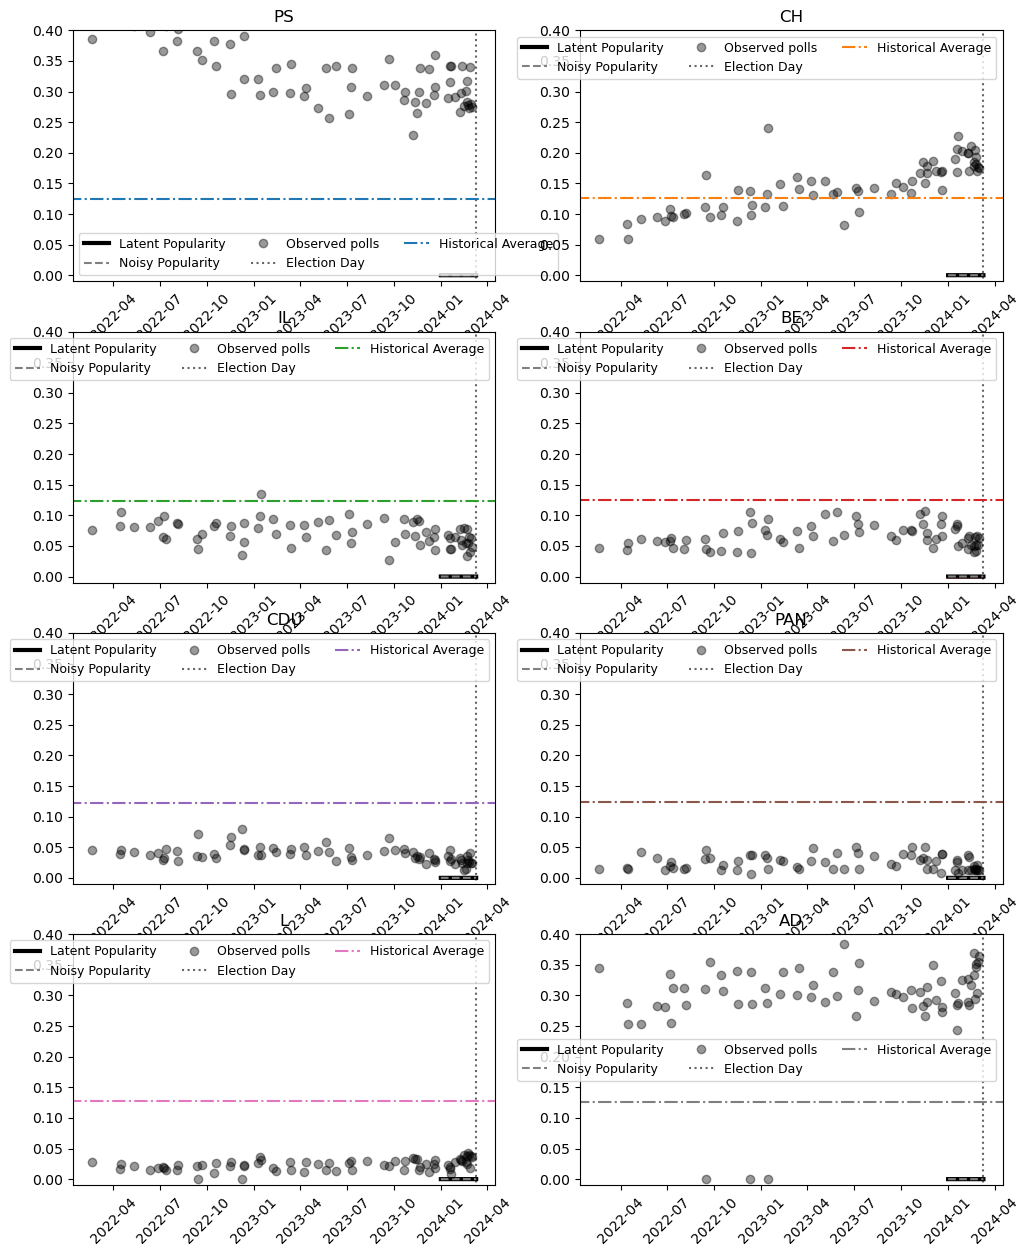

In [7]:
predictive_plot(
    idata=election_forecast,
    parties_complete=b.political_families,
    election_date="2024-03-10",
    polls_train=b.polls_train[b.polls_train.election_date == "2024-03-10"],
    polls_test=None,
)